![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
#bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
bikes = pd.read_csv('bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

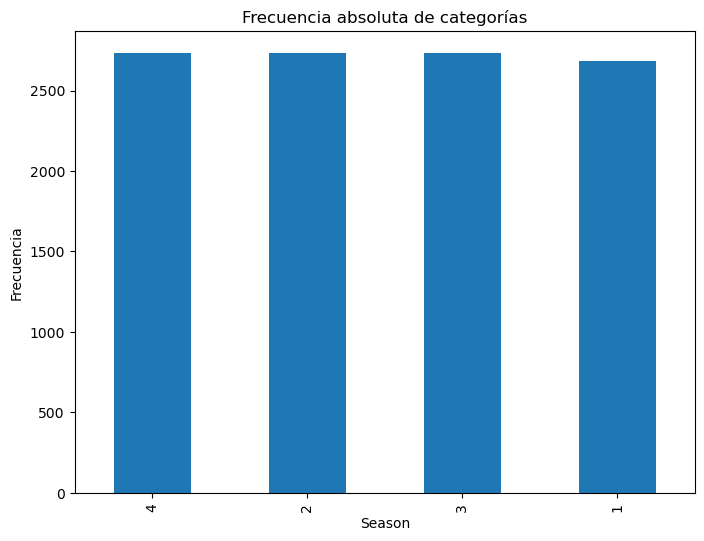

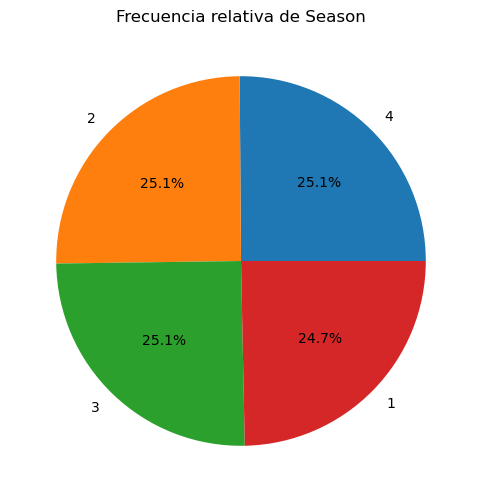

In [4]:
# Celda 1.1
display(bikes.groupby('season').total.mean())

absolute_frequency = bikes['season'].value_counts()
plt.figure(figsize=(8, 6))
absolute_frequency.plot(kind='bar')
plt.title('Frecuencia absoluta de categorías')
plt.xlabel('Season')
plt.ylabel('Frecuencia')
plt.show()

relative_frequency = bikes['season'].value_counts(normalize=True)
plt.figure(figsize=(8, 6))
relative_frequency.plot(kind='pie', autopct='%1.1f%%')
plt.title('Frecuencia relativa de Season')
plt.ylabel('')
plt.show()

In [5]:
bikes['season'].describe()

count    10886.000000
mean         2.506614
std          1.116174
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: season, dtype: float64

La variable Season cuenta con 10886 observaciones y tiene cuatro estaciones. Al validar el balanceo de cada categoría se encontró que la frecuencia de cada una es muy cercana, con una leve menor frecuencia para la categoría Invierno, que cuenta con el 24.7% de participación de la base de datos frente al 25.1% de las demás categorías. También se identificó que en Invierno se tiene la media más baja de bicicletas alquiladas, con aproximadamente 116 bicicletas. En Primavera se observa  un aumento significativo en la media de bicicletas alquiladas, con alrededor de 215 bicicletas En Verano se 3 tiene una media aún más alta, superando las 234 bicicletas alquiladas en promedi No obstante, en Otoño senevidenciatra una disminución en la me 1, con aproximadamente 199 bicicletas alquiladas en promedio.

In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

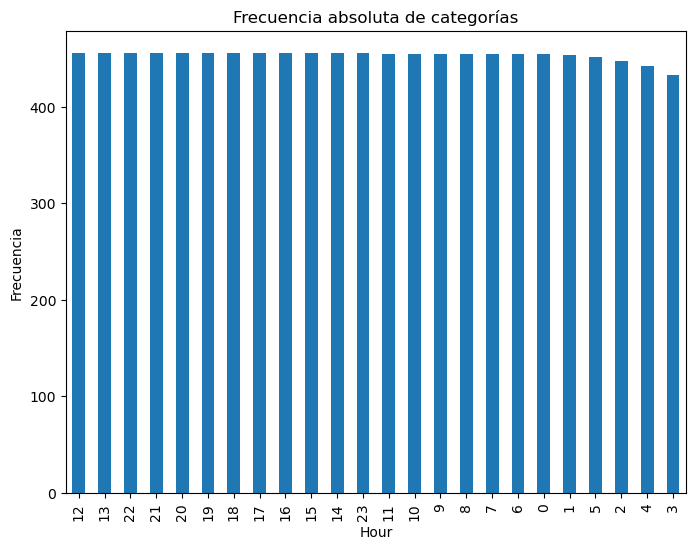

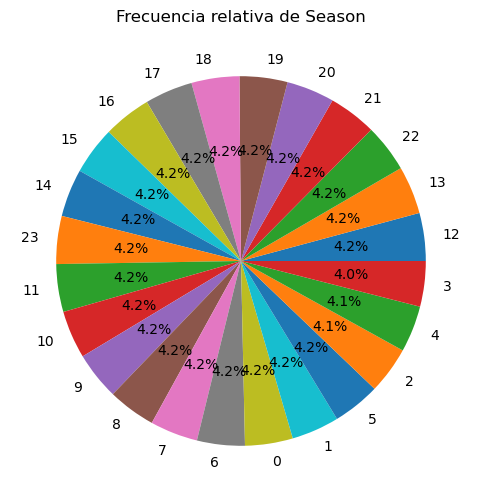

In [7]:
bikes['hour'].describe()

absolute_frequency = bikes['hour'].value_counts()
plt.figure(figsize=(8, 6))
absolute_frequency.plot(kind='bar')
plt.title('Frecuencia absoluta de categorías')
plt.xlabel('Hour')
plt.ylabel('Frecuencia')
plt.show()

relative_frequency = bikes['hour'].value_counts(normalize=True)
plt.figure(figsize=(8, 6))
relative_frequency.plot(kind='pie', autopct='%1.1f%%')
plt.title('Frecuencia relativa de Season')
plt.ylabel('')
plt.show()

La variable Hour cuenta con 10886 observaciones y tiene cuatro categorías. Al validar el balanceo de cada categoría se encontró que la frecuencia de cada categoría es muy cercana, con una leve menor frecuencia para las categorías: 1, 5, 2 4 y 3. Al revisar los datos, se encontró que el número promedio de bicicletas alquiladas alcanza su punto más bajo entre las 4 a.m. y las 5 a.m., con aproximadamente 6 bicicletas alquiladas por hora.
La demanda comienza a aumentar gradualmente a medida que avanza la mañana, con un aumento significativo en las horas pica (entre las 7 a.m. y las 9 a.m.). A las 8 a.m., la media supera las 360 bicicletas alquiladas por hora Por su parte, en la tarde se encuentra un comportamiento similar en la hora pico e (entre las 4 p.m. y las 6 p.m.), con un máximo de alrededor de 470 bicicletas alquiladas por hora a las 5 p. Luego de esto,de, la demanda comienza a disminuir gradualmente, pero aún se mantiene relativamente alta hasta las 8 p m.
A partir de las 9 p.m., la demanda de bicicletas alquiladas disminuye considerablemente, con menos de 100 bicicletas alquiladas por hora.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

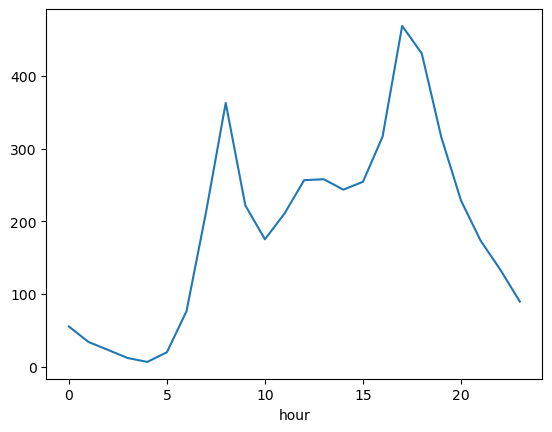

In [8]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

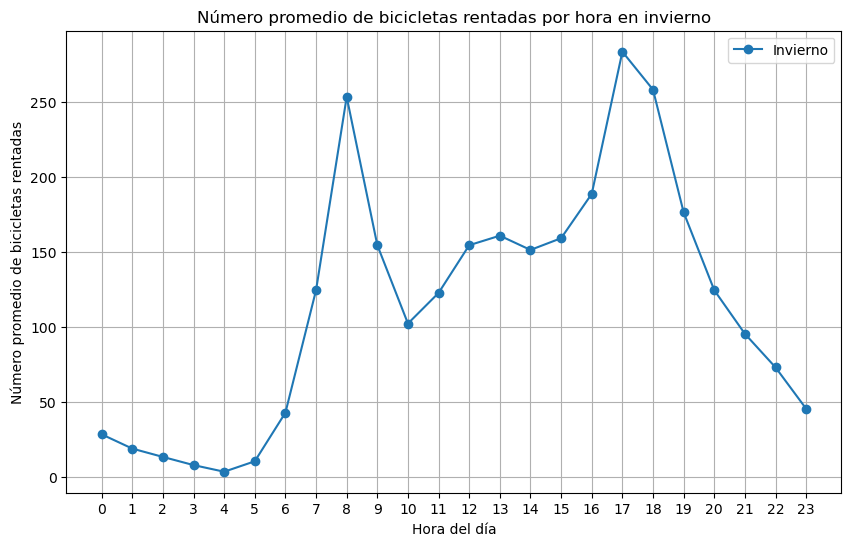

In [9]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
winter_data = bikes[bikes['season'] == 1]
winter_hourly_avg = winter_data.groupby('hour')['total'].mean()

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(winter_hourly_avg.index, winter_hourly_avg.values, label='Invierno', marker='o')
plt.title('Número promedio de bicicletas rentadas por hora en invierno')
plt.xlabel('Hora del día')
plt.ylabel('Número promedio de bicicletas rentadas')
plt.xticks(range(24))  # Mostrar todas las horas del día en el eje x
plt.legend()
plt.grid(True)
plt.show()

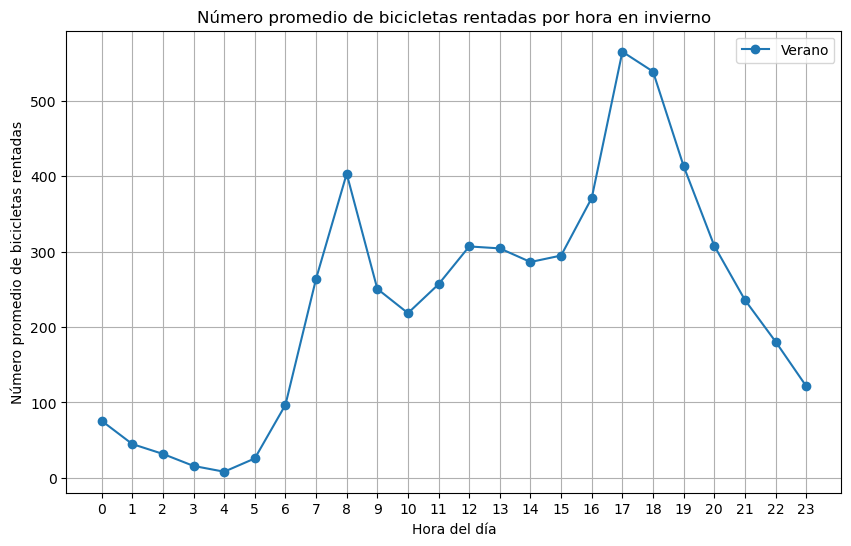

In [10]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
summer_data = bikes[bikes['season'] == 3]
summer_hourly_avg = summer_data.groupby('hour')['total'].mean()

plt.figure(figsize=(10, 6))
plt.plot(summer_hourly_avg.index, summer_hourly_avg.values, label='Verano', marker='o')
plt.title('Número promedio de bicicletas rentadas por hora en invierno')
plt.xlabel('Hora del día')
plt.ylabel('Número promedio de bicicletas rentadas')
plt.xticks(range(24))  # Mostrar todas las horas del día en el eje x
plt.legend()
plt.grid(True)
plt.show()

Luego de observar los gráficos para la cantidad promedio de bicicletas alquiladas durante las 4 estaciones y haciendo enfásis en las estaciones de Invierno y Verano se encontró que las tres gráficas siguen en el mismo patrón en el cual el número promedio de bicicletas alquiladas alcanza su punto más bajo a las 4 a.m. La demanda comienza a aumentar gradualmente a medida que avanza la mañana, con un aumento significativo en las horas pico (entre las 7 a.m. y las 9 a.m.). Ya en la tarde se encuentra un comportamiento similar en la hora pico e (entre las 4 p.m. y las 6 p.m.), con un máximo de bicicletas alquidadas por hora a las 5 p.m. Luego de esto, de, la demanda comienza a disminuir gradualmente, pero aún se mantiene relativamente alta hasta las 8 p m. A partir de las 9 p.m., la demanda de bicicletas alquiladas disminuye considerablemente. Frente a las diferencias encontradas, se puede decir que el promedio de bicicletas alquiladas durante el verano es aproximadamente el doble de las bicicletas que se alquilan durante el Invierno, lo cual puede ser consecuente con condiciones climatológicas menos favorables que impiden a las personas rentar bicicletas para realizar sus desplazamientos.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [11]:
# Celda 3
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


bikes_encoded = pd.get_dummies(bikes, columns=['season'], drop_first=True)

X = bikes_encoded[['hour', 'season_2', 'season_3', 'season_4']]
y = bikes_encoded['total']

model = LinearRegression()
model.fit(X, y)

# Predicciones del modelo
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Calcular los coeficientes del modelo
coef_intercept = model.intercept_
coef_hour = model.coef_[0]
coef_season_2 = model.coef_[1]
coef_season_3 = model.coef_[2]
coef_season_4 = model.coef_[3]

# Imprimir tabla de resumen
print("Tabla de Resumen del Modelo de Regresión Lineal")
print("----------------------------------------------")
print(f"Intercepto:\t\t{coef_intercept}")
print(f"Coeficiente hour:\t{coef_hour}")
print(f"Coeficiente season_2:\t{coef_season_2}")
print(f"Coeficiente season_3:\t{coef_season_3}")
print(f"Coeficiente season_4:\t{coef_season_4}")
print(f"Error Cuadrático Medio (MSE):\t{mse}")
print(f"R^2:\t\t\t{r2}")

Tabla de Resumen del Modelo de Regresión Lineal
----------------------------------------------
Intercepto:		-6.430262462306075
Coeficiente hour:	10.545206094069904
Coeficiente season_2:	100.31723191606588
Coeficiente season_3:	119.4675499459318
Coeficiente season_4:	84.08311787296775
Error Cuadrático Medio (MSE):	25480.694694371625
R^2:			0.22339339904452493



Interpretación de los coeficientes:

Intercepto: El B0 es -6.43. Esto significa que cuando todas las variables predictoras son cero; es decir, cuando la hora es cero y la estación es 'Invierno', el número esperado de bicicletas alquiladas es de aproximadamente -6.43.

'Hour': El coeficiente de la variable 'hour' es 10.55. Esto significa que, manteniendo todas las otras variables constantes, por cada aumento de una unidad en la hora del día, se espera un incremento de aproximadamente 10.55 en el número de bicicletas alquiladas.

'Season': Los coeficientes de las variables dummy de estación (Season_2, Season_3 y Season_4) indican el cambio esperado en el número de bicicletas alquiladas en comparación con la estación de referencia, en este caso el Invierno. Por ejemplo:
    Para la 'season 2' (Primavera), el coeficiente es 100.32. Esto significa que, en comparación con la estación de 'Invierno', se espera que en 'Primavera' haya aproximadamente 100.32 más bicicletas alquiladas.
    Para la 'season 3' (Verano), el coeficiente es 119.46. Esto significa que, en comparación con la estación de 'Invierno', se espera que en 'Verano' haya aproximadamente 119.46 más bicicletas alquiladas.
    Para la 'season 4' (Otoño), el coeficiente es 84.08. Esto significa que, en comparación con la estación de 'Invierno', se espera que en 'Otoño' haya aproximadamente 84.08 más bicicletas alquiladas.

R^2: El coeficiente de determinación (R^2) es 0.2234. Esto significa que el modelo explica aproximadamente el 22.34% de la variabilidad de la variable dependiente, en este caso del número de bicicletas alquiladas, puede ser explicada por las variables independientes en el modelo de regresión

Limitaciones de la Regresión:

Pueden existir varias limitaciones de la regresión. Para este caso, destacamos que se puede estar viendo afectado: 1) Supuestos de linealidad, 2) Supuesto de normalidad sobre los errores, 3) Supuesto de independencia de los errores y 4) Multicolinealidad. Para este caso se puede estar dando que la relación entre las variables predictoras y la variable de respuesta no sea lineal. Adicional se puede estar incumpliendo el supuesto que los errores tienen distribución normal con media cero y varianza constante, además que los errores puedes estar correlacionados. Por último, para el caso de la variable 'season' y las variables dummy que se generaron se puede estar presentando problemas de multicolinealidad, al existir correlación entre las variables.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [12]:
# Celda 4
#Codificar variables categóricas
bikes['season'] = pd.factorize(bikes.season)[0]
feature_cols=['season','hour']
bikes.total.describe()

# Separación de variables predictoras (X) y variable de interes (y)
X = bikes[feature_cols]
y = (bikes.total > 145).astype(int)

def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

j, split, gain = best_split(X, y, 6)

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

# Aplicación de la función tree_grow
tree= tree_grow(X, y, level=0, min_gain=0.001, max_depth=7, num_pct=10)
display(tree)

# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

tree_predict(X, tree)

{'y_pred': 0,
 'y_prob': 0.49917340191036,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 0.16178755449047394,
 'sl': {'y_pred': 0,
  'y_prob': 0.0942714126807564,
  'level': 1,
  'split': [1, 7.0],
  'n_samples': 3594,
  'gain': 0.06425451863089747,
  'sl': {'y_pred': 0,
   'y_prob': 0.026106335561922954,
   'level': 2,
   'split': [1, 6.0],
   'n_samples': 3139,
   'gain': 0.0027878761479700337,
   'sl': {'y_pred': 0,
    'y_prob': 0.010796723752792257,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': 0.0008089140964271449},
   'sr': {'y_pred': 0,
    'y_prob': 0.11816192560175055,
    'level': 3,
    'split': [0, 2.0],
    'n_samples': 455,
    'gain': 0.009214309359181827,
    'sl': {'y_pred': 0,
     'y_prob': 0.05240174672489083,
     'level': 4,
     'split': [0, 1.0],
     'n_samples': 227,
     'gain': 0.004655188204359839,
     'sl': {'y_pred': 0,
      'y_prob': 0.008695652173913044,
      'level': 5,
      'split': -1,
      'n_samples': 1

array([0., 0., 0., ..., 1., 0., 0.])

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

(0.8424509060717638, 6)

El MSE del modelo en la muestra de evaluación es igual a:
0.1578068466462566


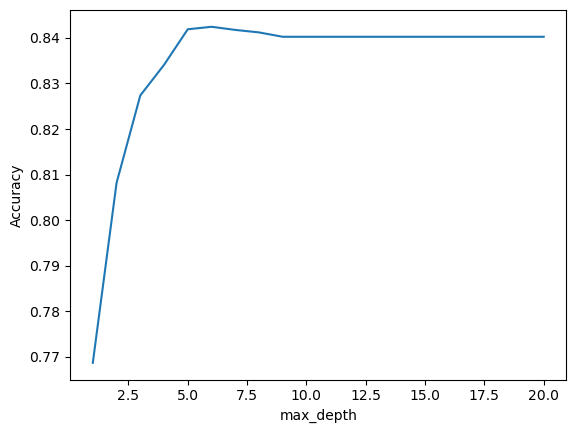

In [13]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)
# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []
# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Dividir la muestra
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=0)

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, XTrain, yTrain, cv=6, scoring='accuracy').mean())

plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

display(sorted(zip(accuracy_scores, max_depth_range))[::-1][0])

clf = DecisionTreeClassifier(max_depth=6, random_state=1)
clf.fit(XTrain, yTrain)

prediccion=clf.predict(XTest)
MSEArbol=np.average(np.square(prediccion-yTest))
print("El MSE del modelo en la muestra de evaluación es igual a:")
print(MSEArbol)

In [14]:
#Importancia de las variables
display(pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_}).sort_values('importance'))

# Impresión de resultados de desempeño del árbol de decisión
display(pd.Series(cross_val_score(clf, XTrain, yTrain, cv=10)).describe())

,feature,importance
0,season,0.160124
1,hour,0.839876


count    10.000000
mean      0.842312
std       0.011197
min       0.828532
25%       0.832305
50%       0.843621
75%       0.847603
max       0.865569
dtype: float64

MSE
Regresión Lineal: 25480.694694371625
Árboles de Decisión: 0.1586418035068188

Frente al desempeño de la métrica MSE en la regresión lineal se puede decir que el modelo tiene un error de predicción significativo en el conjunto de datos, sugiriendo que las predicciones del modelo tienden a desviarse considerablemente de los valores reales. Esto se puede dar porque la regresión lineal tiene dificultades cuando hay relaciones "complejas entre variables". Por su parte, el desempeño de la métrica MSE del Árbol de decisión indica un buen ajuste del modelo a los datos. En términos generales, un MSE cercano a cero sugiere que el modelo es capaz de predecir las respuestas con una precisión muy alta en el conjunto de datos de prueba.

Frente al resultado, se destaca que los árboles de decisión tienen ventajas gracias a su flexibilidad en la estructura, manejo natural de características o variables categóricas y no requieren supuestos sobre la distribución de los datos.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [15]:
# Lectura de la información de archivo .csv
#df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df = pd.read_csv('mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [22]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [27]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [38]:
# Celda 6
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def metricas(predicciones, prediccionesProb):
    #### Metricas
    accuracy=accuracy_score(y_true=y_test, y_pred=predicciones)
    precision=precision_score(y_true=y_test, y_pred=predicciones)
    f1score=f1_score(y_true=y_test, y_pred=predicciones)
    
    tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=predicciones).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    
    print(confusion_matrix(y_true=y_test, y_pred=predicciones))
    print("Verdaderos Negativos (TN):", tn)
    print("Falsos Positivos (FP):", fp)
    print("Falsos Negativos (FN):", fn)
    print("Verdaderos Positivos (TP):", tp)

    print('\n')
    print('La exactitud del modelo es:' + str(round(accuracy,3)))
    print('El F1 score del modelo es:' + str(round(f1score,3)))
    print('La precisión del modelo es:' + str(round(precision,3)))
    print('La especificidad del modelo es:', round(specificity, 3))
    print('La sensibilidad del modelo es:', round(sensitivity, 3))
    
max_depth_range = range(1, 21)
accuracy_scores1 = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores1.append(cross_val_score(clf, X_train, y_train, cv=6, scoring='accuracy').mean())

display(sorted(zip(accuracy_scores1, max_depth_range))[::-1][0])

clfTree = DecisionTreeClassifier(max_depth=2, random_state=1)
clfTree.fit(X_train, y_train)
predicciones = clfTree.predict(X_test)
prediccionesProb = clfTree.predict_proba(X_test)
print("Árboles de Decisión")
metricas(predicciones,prediccionesProb)

(0.6288888888888889, 2)

[[485 259]
 [273 483]]
Verdaderos Negativos (TN): 485
Falsos Positivos (FP): 259
Falsos Negativos (FN): 273
Verdaderos Positivos (TP): 483


La exactitud del modelo es:0.645
El F1 score del modelo es:0.645
La precisión del modelo es:0.651
La especificidad del modelo es: 0.652
La sensibilidad del modelo es: 0.639


In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

predicciones = model.predict(X_test)
prediccionesProb = model.predict_proba(X_test)
print("Regresión Logística")
metricas(predicciones,prediccionesProb)

Regresión Logística
[[467 277]
 [302 454]]
Verdaderos Negativos (TN): 467
Falsos Positivos (FP): 277
Falsos Negativos (FN): 302
Verdaderos Positivos (TP): 454


La exactitud del modelo es:0.614
El F1 score del modelo es:0.611
La precisión del modelo es:0.621
La especificidad del modelo es: 0.628
La sensibilidad del modelo es: 0.601


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [46]:
# Celda 7
# Seleción de variables numéricas
y.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

#####
# Creación de las primeras 100 muestras de bootstrap
n_estimators = 100
np.random.seed(123)
n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

# Entrenamiento de 100 modelos con las 100 muestras boostrap
from sklearn.tree import DecisionTreeClassifier

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=10, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

####
# Creación de las segundas 100 muestras de bootstrap
n_estimators = 100
np.random.seed(124)
n_samples = X_train.shape[0]
samples1 = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

np.random.seed(124) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees1 = {}
for i in range(n_estimators):
    trees1[i] = DecisionTreeClassifier(max_features="sqrt", min_samples_leaf=3, random_state=seeds[i])
    trees1[i].fit(X_train.iloc[samples1[i]], y_train.iloc[samples1[i]])

# Predicción para los datos del set de test con cada modelo
y_pred_df1 = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df1.iloc[:, i] = trees1[i].predict(X_test)

####
# Creación de las terceras 100 muestras de bootstrap
from sklearn.linear_model import LogisticRegression
n_estimators = 100
np.random.seed(125)
n_samples = X_train.shape[0]
samples2 = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

np.random.seed(125) 
seeds = np.random.randint(1, 10000, size=n_estimators)

log = {}
for i in range(n_estimators):
    log[i] = LogisticRegression(random_state=seeds[i])
    log[i].fit(X_train.iloc[samples2[i]], y_train.iloc[samples2[i]])

# Predicción para los datos del set de test con cada modelo
y_pred_df2 = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df2.iloc[:, i] = log[i].predict(X_test)

In [66]:
y_pred = (y_pred_df.sum(axis=1)+y_pred_df.sum(axis=1)+y_pred_df.sum(axis=1) >= (n_estimators / 2))
# Desempeño al hacer votación mayoritaria
from sklearn import metrics
print("F1 Score:")
display(metrics.f1_score(y_pred, y_test))
print("Accuracy")
display(metrics.accuracy_score(y_pred, y_test))

F1 Score:


0.6971864568431092

Accuracy


0.5766666666666667

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [99]:
# Celda 8

#primeras 100 muestras de bootstrap
samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

# Estimación de los errores OOB para cada clasificador
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

#segundas 100 muestras de bootstrap
samples_oob1 = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample1 in samples:
    samples_oob1.append(sorted(set(range(n_samples)) - set(sample)))

# Estimación de los errores OOB para cada clasificador
errors1 = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees1[i].predict(X_train.iloc[samples_oob1[i]])
    errors1[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob1[i]], y_pred_)

#terceras 100 muestras de bootstrap
samples_oob2 = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample1 in samples:
    samples_oob2.append(sorted(set(range(n_samples)) - set(sample)))

# Estimación de los errores OOB para cada clasificador
errors2 = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = log[i].predict(X_train.iloc[samples_oob2[i]])
    errors2[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob2[i]], y_pred_)

alpha = (1 - errors) / (1 - errors).sum()
alpha1 = (1 - errors1) / (1 - errors1).sum()
alpha2 = (1 - errors2) / (1 - errors2).sum()

# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_2 = ((y_pred_df1) * alpha1).sum(axis=1)
weighted_sum_3 = ((y_pred_df2) * alpha2).sum(axis=1)

# Desempeño al hacer votación ponderada
y_pred = (((weighted_sum_1+weighted_sum_2+weighted_sum_3)/3) >= 0.5)

print("F1 Score:")
display(metrics.f1_score(y_pred, y_test))
print("Accuracy")
display(metrics.accuracy_score(y_pred, y_test))

F1 Score:


0.6222826086956521

Accuracy


0.6293333333333333

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

# Celda 9
Votación Mayoritaria:
F1 Score: 0.6971
Accuracy: 0.5766666666666667

Votación Ponderada:
F1 Score: 0.6222826086956521
Accuracy: 0.6293333333333333

En primera impresión se observa que el Accurracy de la votación ponderada muestra una mejora en comparación con la votación mayoritaria. No obstante, la mejora puede no ser significativa y podría estar relacionada con las peculiaridades específicas del conjunto de datos utilizado, más aún si tenemos en cuenta el peor desempeño en el F1 Score de la votación ponderada frente a la votación mayoritaria.

En cuanto a la Votación Mayoritaria se descata que tiene ventajas en simplicidad, al tener un enfoque simple y fácil de implementar, y en interpretabilidad, al contar con resultados fáciles de entender y explicar. No obstante, tiene dificultades ya que ignora la confiabilidad de cada modelo base y no tiene en cuenta la distribución de los errores. Por su parte, la Votación Ponderada tiene ventajas en la personalización y la
Flexibilidad. Sin embargo, requiere ajuste de hiperparámetros y aveces tiene mayor complejidad en su implementación. En resumen, la elección entre la votación mayoritaria y la votación ponderada depende de la naturaleza del problema, la estructura del conjunto de datos y las necesidades específicas del modelo.